#### Library imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_auc_score

import utilities as utils

#### Loads the raw datacube

In [2]:
data = utils.load_dataset("data/LAWLEY22-DATACUBE/2021_Table04_Datacube.csv")
data.head()

,"ï»¿""H3_Address""",H3_Resolution,H3_Geometry,Longitude_EPSG4326,Latitude_EPSG4326,Continent_Majority,Continent_Minority,Country_Majority,Country_Minority,Province_Majority,...,Litmod_Density_Asthenosphere,Litmod_Density_Crust,Litmod_Density_Lithosphere,Crust1_Type,Crust1_CrustalThickness,Crust1_SedimentThickness,Training_MVT_Deposit,Training_MVT_Occurrence,Training_CD_Deposit,Training_CD_Occurrence
0,8712e579bffffff,7,"POLYGON ((-115.0314 54.5077, -115.0393 54.4961...",-115.018142,54.497221,North America,North America,Canada,Canada,Alberta,...,3480.580078,2891.260254,3337.300049,island arc,-38.450497,2991.459961,Absent,Absent,Absent,Absent
1,8712e579affffff,7,"POLYGON ((-115.0658 54.51706, -115.0737 54.505...",-115.052542,54.506590,North America,North America,Canada,Canada,Alberta,...,3480.580078,2891.260010,3337.300293,island arc,-38.430000,3000.000244,Absent,Absent,Absent,Absent
2,8712e56b4ffffff,7,"POLYGON ((-115.0604 54.49501, -115.0682 54.483...",-115.047107,54.484541,North America,North America,Canada,Canada,Alberta,...,3480.580078,2891.259766,3337.300049,island arc,-38.430000,3000.000000,Absent,Absent,Absent,Absent
3,8712e56b5ffffff,7,"POLYGON ((-115.026 54.48564, -115.0338 54.4740...",-115.012729,54.475169,North America,North America,Canada,Canada,Alberta,...,3480.580078,2891.260010,3337.300049,island arc,-38.591599,2932.666504,Absent,Absent,Absent,Absent
4,8712e56a6ffffff,7,"POLYGON ((-114.997 54.49832, -115.0049 54.4867...",-114.983753,54.487840,North America,North America,Canada,Canada,Alberta,...,3480.580078,2891.260010,3337.300049,island arc,-39.815273,2422.801758,Absent,Absent,Absent,Absent


### Modifies presence / absence columns to boolean - geology properties

In [3]:
data["Geology_Dictionary_Alkalic"] = data["Geology_Dictionary_Alkalic"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Anatectic"] = data["Geology_Dictionary_Anatectic"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Calcareous"] = data["Geology_Dictionary_Calcareous"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Carbonaceous"] = data["Geology_Dictionary_Carbonaceous"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Cherty"] = data["Geology_Dictionary_Cherty"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_CoarseClastic"] = data["Geology_Dictionary_CoarseClastic"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Evaporitic"] = data["Geology_Dictionary_Evaporitic"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Felsic"] = data["Geology_Dictionary_Felsic"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_FineClastic"] = data["Geology_Dictionary_FineClastic"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Gneissose"] = data["Geology_Dictionary_Gneissose"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Igneous"] = data["Geology_Dictionary_Igneous"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Intermediate"] = data["Geology_Dictionary_Intermediate"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Pegmatitic"] = data["Geology_Dictionary_Pegmatitic"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_RedBed"] = data["Geology_Dictionary_RedBed"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Schistose"] = data["Geology_Dictionary_Schistose"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Sedimentary"] = data["Geology_Dictionary_Sedimentary"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_UltramaficMafic"] = data["Geology_Dictionary_UltramaficMafic"].apply(lambda x: True if x == "Present" else False)
# modifies presence / absence columns to boolean - labels
data["Training_MVT_Deposit"] = data["Training_MVT_Deposit"].apply(lambda x: True if x == "Present" else False)
data["Training_MVT_Occurrence"] = data["Training_MVT_Occurrence"].apply(lambda x: True if x == "Present" else False)
data["Training_CD_Deposit"] = data["Training_CD_Deposit"].apply(lambda x: True if x == "Present" else False)
data["Training_CD_Occurrence"] = data["Training_CD_Occurrence"].apply(lambda x: True if x == "Present" else False)

#### Selects the input variable data used for MVT WOE updated

In [4]:
cols_dict = utils.load_features_dict(deptype='MVT', baseline='updated')
data_filtered, cols = utils.extract_cols(data, cols_dict)

data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5164970 entries, 0 to 5164969
Data columns (total 27 columns):
 #   Column                                          Dtype  
---  ------                                          -----  
 0   H3_Geometry                                     object 
 1   Continent_Majority                              object 
 2   Geology_Lithology_Majority                      object 
 3   Geology_Period_Maximum_Majority                 object 
 4   Geology_Period_Minimum_Majority                 object 
 5   Sedimentary_Dictionary                          bool   
 6   Igneous_Dictionary                              bool   
 7   Metamorphic_Dictionary                          bool   
 8   Geology_Paleolatitude_Period_Maximum            float64
 9   Terrane_Proximity                               float64
 10  Geology_PassiveMargin_Proximity                 float64
 11  Geology_BlackShale_Proximity                    float64
 12  Geology_Fault_Proximity     

#### Selects target variable data used for WOE updated
The following function finds all the neighbors and creates a new column "MVT_Deposit". Original paper treats neighbors of polygons with "Training_MVT_Deposit=Present" and "Training_MVT_Occurrence=Present" as mineral present, "MVT_Deposit=Present" (note: now Deposit means - Deposit, Occurrence, or their neighbor).

In [5]:
data_filtered = utils.neighbor_deposits(data_filtered, deptype='MVT')
print(data_filtered['MVT_Deposit'].value_counts())
print(data_filtered['MVT_Deposit_wNeighbors'].value_counts())

MVT_Deposit
False    5162943
True        2027
Name: count, dtype: int64
MVT_Deposit_wNeighbors
False    5155482
True        9488
Name: count, dtype: int64


#### Implements WOE updated preprocessing on datacube

In [6]:
labels_filtered = data_filtered['MVT_Deposit_wNeighbors'] # store target for later use
geometry_filtered = data_filtered["H3_Geometry"] # store polygons for later use
continent_filtered = data_filtered["Continent_Majority"] # store continent for later use

data_filtered = data_filtered.drop(columns=['H3_Geometry', 'Continent_Majority', 'Training_MVT_Deposit', 'Training_MVT_Occurrence', 'MVT_Deposit', 'MVT_Deposit_wNeighbors'])
cols = cols[2:-2]

Clearly the dataset has MANY outliers, as reported in the paper

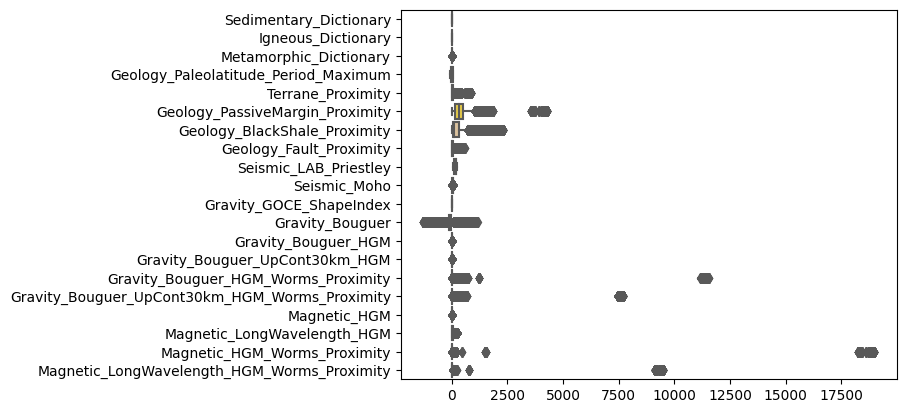

In [7]:
ax = sns.boxplot(data=data_filtered, orient="h", palette="Set2")

We can remove these outliers

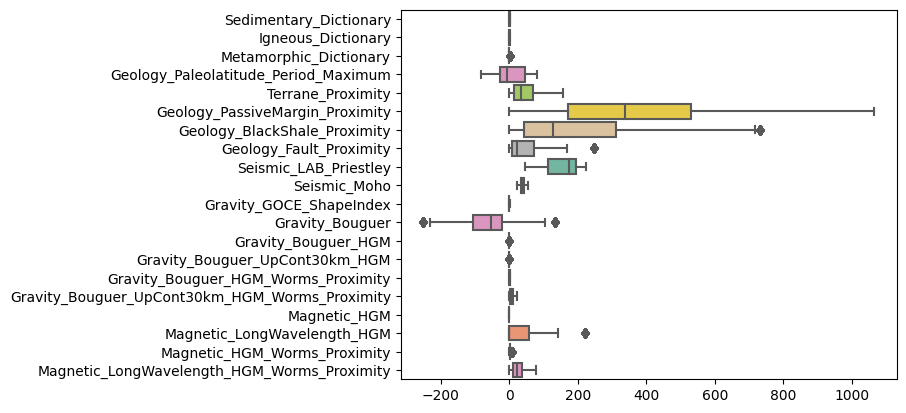

In [8]:
data_filtered = utils.tukey_remove_outliers(data_filtered)
ax = sns.boxplot(data=data_filtered, orient="h", palette="Set2")

There are also many NaNs in the data, these can be "imputed" with the mean value.

In [9]:
print(data_filtered.isna().sum())

Geology_Lithology_Majority                              0
Geology_Period_Maximum_Majority                     44289
Geology_Period_Minimum_Majority                     44289
Sedimentary_Dictionary                                  0
Igneous_Dictionary                                      0
Metamorphic_Dictionary                                  0
Geology_Paleolatitude_Period_Maximum              1271352
Terrane_Proximity                                       0
Geology_PassiveMargin_Proximity                         0
Geology_BlackShale_Proximity                            0
Geology_Fault_Proximity                                 0
Seismic_LAB_Priestley                                   0
Seismic_Moho                                         1307
Gravity_GOCE_ShapeIndex                                 0
Gravity_Bouguer                                     36401
Gravity_Bouguer_HGM                                 36445
Gravity_Bouguer_UpCont30km_HGM                      36427
Gravity_Bougue

In [10]:
data_filtered = utils.impute_nans(data_filtered)
print(data_filtered.isna().sum())

Geology_Lithology_Majority                        0
Geology_Period_Maximum_Majority                   0
Geology_Period_Minimum_Majority                   0
Sedimentary_Dictionary                            0
Igneous_Dictionary                                0
Metamorphic_Dictionary                            0
Geology_Paleolatitude_Period_Maximum              0
Terrane_Proximity                                 0
Geology_PassiveMargin_Proximity                   0
Geology_BlackShale_Proximity                      0
Geology_Fault_Proximity                           0
Seismic_LAB_Priestley                             0
Seismic_Moho                                      0
Gravity_GOCE_ShapeIndex                           0
Gravity_Bouguer                                   0
Gravity_Bouguer_HGM                               0
Gravity_Bouguer_UpCont30km_HGM                    0
Gravity_Bouguer_HGM_Worms_Proximity               0
Gravity_Bouguer_UpCont30km_HGM_Worms_Proximity    0
Magnetic_HGM

Finally, it can be observed the above data is not "normalized", we should make features standard scores / z-scores

(note remaining outliers above were within the Tukey fences calculated over ALL the data)


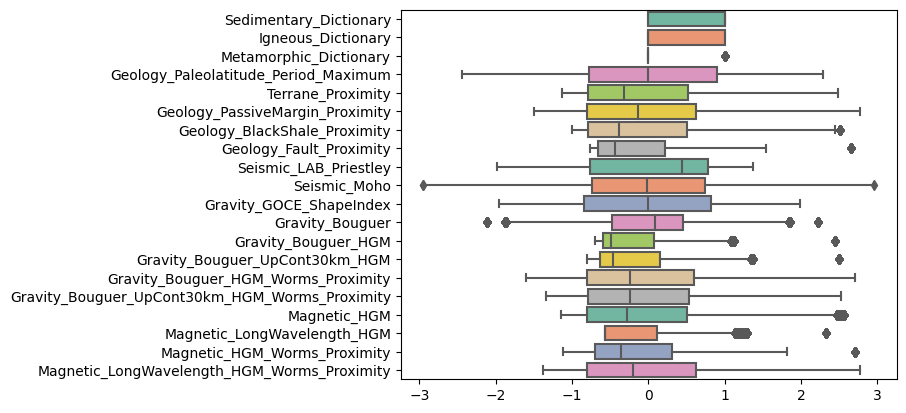

In [11]:
data_filtered = utils.normalize_df(data_filtered)
ax = sns.boxplot(data=data_filtered, orient="h", palette="Set2")
print("(note remaining outliers above were within the Tukey fences calculated over ALL the data)")

Discretizes the continuous variables in 5 bins

In [12]:
nbins = 5
for col in cols:
    if data_filtered[col].dtype != "float64": continue
    data_filtered[col] = pd.qcut(data_filtered[col], nbins)
data_filtered["target"] = labels_filtered

#### Preprocessing completed, the train / test splits can be formed

In [13]:
data_filtered["Latitude_EPSG4326"] = data["Latitude_EPSG4326"]
data_filtered["Training_MVT_Deposit"] = data["Training_MVT_Deposit"]
data_filtered["H3_Geometry"] = geometry_filtered
data_filtered["Continent_Majority"] = continent_filtered

te_df, tr_df, _ = utils.get_spatial_cross_val_idx(data_filtered, test_set=1, split_col="Training_MVT_Deposit", nbins=36)
tr_df = tr_df.drop(columns=["Training_MVT_Deposit"])
te_df = te_df.drop(columns=["Training_MVT_Deposit"])

# test_set = 1 closest split counts in paper
print(f"Train counts: {tr_df['target'].value_counts()}")
print(f"Test counts: {te_df['target'].value_counts()}")

Train counts: target
False    3780339
True        8367
Name: count, dtype: int64
Test counts: target
False    1375143
True        1121
Name: count, dtype: int64


#### Compute WOE / IV for each variable based on the training dataset

In [14]:
lst = []
IV_df = pd.DataFrame(columns=['Variable','IV'])
for col in cols:
    df, iv = utils.calculate_woe_iv(tr_df, col, 'target')
    lst.append(df)
    IV_df = pd.concat([IV_df, pd.DataFrame([{"Variable": col ,"IV": iv,}])], ignore_index=True)

#### Show the overall IV for all input variables

In [15]:
print(f"Information Value Overview:\n{IV_df.sort_values('IV', ascending=False)}\n\n\n")

Information Value Overview:
                                          Variable        IV
1                  Geology_Period_Maximum_Majority  2.931836
2                  Geology_Period_Minimum_Majority  2.717845
0                       Geology_Lithology_Majority  2.013210
6             Geology_Paleolatitude_Period_Maximum  1.640618
11                           Seismic_LAB_Priestley  0.876946
3                           Sedimentary_Dictionary  0.679292
12                                    Seismic_Moho  0.662492
8                  Geology_PassiveMargin_Proximity  0.577027
16                  Gravity_Bouguer_UpCont30km_HGM  0.510041
20                     Magnetic_LongWavelength_HGM  0.492557
4                               Igneous_Dictionary  0.488782
9                     Geology_BlackShale_Proximity  0.459511
14                                 Gravity_Bouguer  0.334221
15                             Gravity_Bouguer_HGM  0.317458
19                                    Magnetic_HGM  0.226

#### Merge the WOE updated data into the existig input datacube

In [16]:
# gets the WOE for all variables on MVT deposits / occurences
tr_result = tr_df
te_result = te_df
all_result = pd.concat([tr_result, te_result])
for i, col in enumerate(cols):
    col_data = lst[i]
    col_data = col_data.rename(columns={"Value":col,"WoE":f"{col}_WoE", "IV":f"{col}_IV"})
    tr_result = pd.merge(tr_result, col_data[[col,f"{col}_WoE",f"{col}_IV"]], on=col)
    te_result = pd.merge(te_result, col_data[[col,f"{col}_WoE",f"{col}_IV"]], on=col)
    all_result = pd.merge(all_result, col_data[[col,f"{col}_WoE",f"{col}_IV"]], on=col)

# combines the WOE for each comlumn
tr_result["WOE Total"] = tr_result.loc[:,[f"{col}_WoE" for col in cols]].sum(axis=1)
te_result["WOE Total"] = te_result.loc[:,[f"{col}_WoE" for col in cols]].sum(axis=1)
all_result["WOE Total"] = all_result.loc[:,[f"{col}_WoE" for col in cols]].sum(axis=1)

#### Finally, run the experiment calculating AUROC for train / test / all splits

In [17]:
auc_score = roc_auc_score(tr_result["target"],tr_result["WOE Total"])
print(f"Train AUC score:{auc_score}")
auc_score = roc_auc_score(te_result["target"],te_result["WOE Total"])
print(f"Test AUC score:{auc_score}")
auc_score = roc_auc_score(all_result["target"],all_result["WOE Total"])
print(f"All AUC score:{auc_score}")

Train AUC score:0.9125900093094983
Test AUC score:0.9174254288875018
All AUC score:0.9135379836570637


Note - results above differ depending on the test split chosen (higher or lower). Lawley'22 reported using fold 5 of 6 for test split, above we're using 2 of 6 because it had the closest number of train / test example reported in the paper. Our IV values for all variables are largely similar to the Lawley'22 Figure 11a, again not identical due to differences in particular examples chosen as test set.

#### Optionally, visualize and / or rasterize the produced datacube
The below code can be used to visualize and / or rasterize the produced datacube (or subset of). This includes the input variables and target variable. It is very useful for debugging / sanity checks.

/tmp/ipykernel_22021/1712107685.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continent_datacube.rename({


Rasterizing Oceania
Plotting - ['WOE Total']


  0%|          | 0/1 [00:00<?, ?it/s]

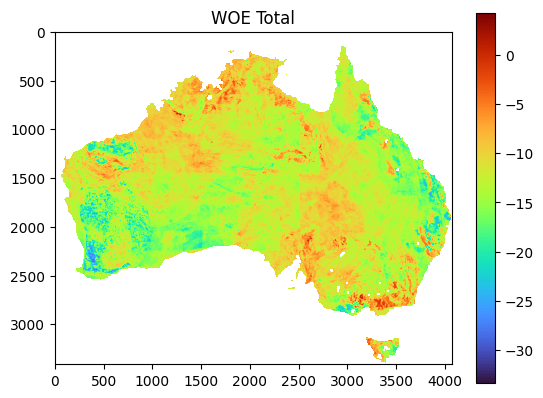

100%|██████████| 1/1 [01:14<00:00, 74.64s/it]


Outputting - ['WOE Total']


100%|██████████| 1/1 [01:13<00:00, 73.67s/it]
/tmp/ipykernel_22021/1712107685.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continent_datacube.rename({


Rasterizing North America
Plotting - ['WOE Total']


  0%|          | 0/1 [00:00<?, ?it/s]

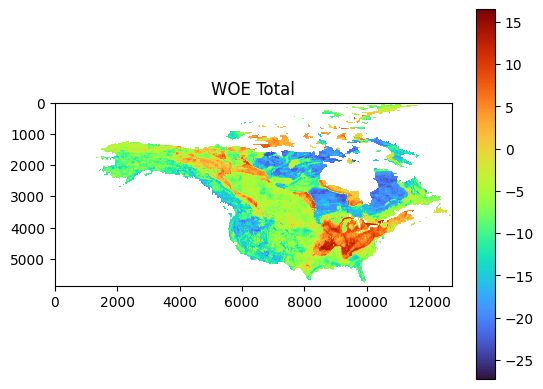

100%|██████████| 1/1 [02:59<00:00, 179.91s/it]


Outputting - ['WOE Total']


100%|██████████| 1/1 [02:53<00:00, 173.95s/it]


In [18]:
from os import makedirs
from shapely import wkt
import rasterio

# subset of datacube to visualize / rasterize - first two columns **MUST** be included
raster_df = all_result[["H3_Geometry", "Continent_Majority", "WOE Total"]].copy()

# sets location for output raster(s)
output_dir = './data/outputs/'
makedirs(output_dir, exist_ok=True)

# bounds for each continent - visualized / rasterized separately
continents = {
    "Oceania": {'left':112.9, 'bottom':-43.6, 'right':153.6, 'top':-9.5},
    "North America": {'left':-179.8, 'bottom':24.5, 'right':-52.6, 'top':83.15}
}

# (height, width) in CRS metric
resolution = (0.01, 0.01)

# make strings into shapely polygon type
raster_df["H3_Geometry"] = raster_df["H3_Geometry"].apply(wkt.loads)

# rasterizes / visualizes each continent in datacube (set of bounds)
for idx, (continent, bounds) in enumerate(continents.items()):
    print(f"Rasterizing {continent}")

    # selects subset of datacube on continent
    continent_datacube = raster_df[raster_df["Continent_Majority"] == continent]

    # defines the raster size in pixels from bounds / resolution
    height = int((bounds["top"]-bounds["bottom"]) / resolution[0])
    width = int((bounds["right"]-bounds["left"]) / resolution[1])

    # defines raster transforms from bounds and size
    tif_tf = rasterio.transform.from_bounds(
        bounds["left"],
        bounds["bottom"],
        bounds["right"],
        bounds["top"],
        width,
        height
    )

    # sets meta data for rasters
    tiff_meta = {
        "driver": 'GTiff',
        "height": height,
        "width": width,
        "count": 1,
        "dtype": "float32",
        "crs": rasterio.CRS.from_epsg(4326),
        "transform": tif_tf,
        "nodata": np.nan,
        "compress": "lzw",
    }

    # renames columns to be conistent with Lawley'22
    continent_datacube.rename({
        # geology
        "Geology_Lithology_Majority": "Lithology (major)",
        "Geology_Period_Maximum_Majority": "Period (maximum)",
        "Geology_Period_Minimum_Majority": "Period (minimum)",
        "Geology_Paleolatitude_Period_Maximum": "Paleo-latitude",
        "Terrane_Proximity": "Proximity to terrane boundaries",
        "Geology_PassiveMargin_Proximity": "Proximity to passive margins",
        "Geology_BlackShale_Proximity": "Proximity to black shales",
        "Geology_Fault_Proximity": "Proximity to faults",
        "Sedimentary_Dictionary": "Sedimentary dictionaries",
        "Igneous_Dictionary": "Igneous dictionaries",
        "Metamorphic_Dictionary": "Metamorphic dictionaries",
        # geophysics
        "Seismic_LAB_Priestley": "Depth to Lab",
        "Seismic_Moho": "Depth to Moho",
        "Gravity_GOCE_ShapeIndex": "Satellite Gravity",
        "Gravity_Bouguer": "Gravity Bouguer",
        "Gravity_Bouguer_HGM": "Gravity HGM",
        "Gravity_Bouguer_UpCont30km_HGM": "Gravity upward-continued HGM",
        "Gravity_Bouguer_HGM_Worms_Proximity": "Gravity Worms",
        "Gravity_Bouguer_UpCont30km_HGM_Worms_Proximity": "Gravity upward-continued worms",
        "Magnetic_HGM": "Magnetic HGM",
        "Magnetic_LongWavelength_HGM": "Magnetic long-wavelength HGM",
        "Magnetic_HGM_Worms_Proximity": "Magnetic worms",
        "Magnetic_LongWavelength_HGM_Worms_Proximity": "Magnetic long-wavelength worms"
    }, axis=1, inplace=True)
    
    utils.visualize_datacube(continent_datacube, tiff_meta)

    utils.rasterize_datacube(continent_datacube, tiff_meta, output_dir, "lawley_woe_updated_"+continent.lower().replace(" ","-"))